In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-notebook')
%matplotlib inline
import csv
import src.scrubbing as scrubbing
import src.utility 
from sklearn.model_selection import cross_val_score

In [3]:
feature_names = ['p7_9','p10_12', 'p13_18', 'p19_24', 'p25_36', '94013', '94014', '94080', '94101', '94102', '94103', '94104',
       '94105', '94107', '94108', '94109', '94110', '94111', '94112', '94114',
       '94115', '94116', '94117', '94118', '94120', '94121', '94122', '94123',
       '94124', '94127', '94129', '94130', '94131', '94132', '94133', '94134',
       '94143', '94158']

In [4]:
df8 = pd.read_pickle('data/sf_inspection_master.pkl')

In [5]:
y = df8['y_label']
X = df8[feature_names]

In [6]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.20, random_state=38)

In [7]:
X_train, X_validation, y_train, y_validation = train_test_split(X_tr, y_tr, test_size=0.25, random_state=28)

# Learning rate

In [36]:
learning_rates = [x/40 for x in range(1,20)]
L_train = []
L_validation = []
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=40, learning_rate = learning_rate, max_features=4, max_depth=8, subsample=0.4,random_state = 0)
    gb.fit(X_train, y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))
    score_train = gb.score(X_train, y_train)
    score_validation = gb.score(X_validation, y_validation)
    L_train.append(score_train)
    L_validation.append(score_validation)

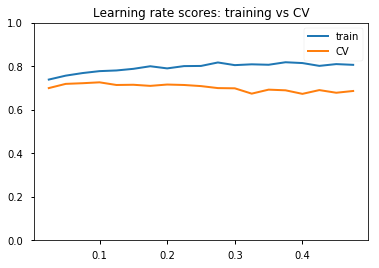

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(learning_rates, L_train, linewidth=2, label='train')
ax.set_ylim(0, 1)
ax.set_title("Learning rate scores: training vs CV")
ax.plot(learning_rates, L_validation, linewidth=2, label='CV')
ax.legend()

In [38]:
# Let's use learning rate of 0.5
gb = GradientBoostingClassifier(n_estimators=40, learning_rate = 0.08, max_features=4, max_depth = 8, subsample=0.4,random_state = 0)
gb.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))
# The "validation" here is a correct term. It is not a "test" set.

Accuracy score (training): 0.773
Accuracy score (validation): 0.731


## Max depth

In [41]:
max_depths = range(2,20,1)
L_train = []
L_validation = []
for max_depth in max_depths:
    gb = GradientBoostingClassifier(n_estimators=40, learning_rate = 0.08, max_features=4, max_depth = max_depth, subsample=0.4, random_state = 0)
    gb.fit(X_train, y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))
    score_train = gb.score(X_train, y_train)
    score_validation = gb.score(X_validation, y_validation)
    L_train.append(score_train)
    L_validation.append(score_validation)

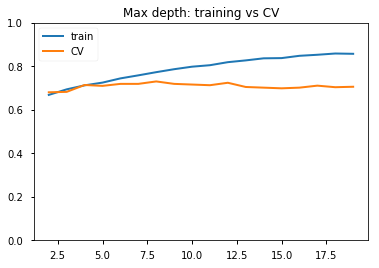

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(max_depths, L_train, linewidth=2, label='train')
ax.set_ylim(0, 1)
ax.set_title("Max depth: training vs CV")
ax.plot(max_depths, L_validation, linewidth=2, label='CV')
ax.legend()

## n_estimators

In [43]:
n_estimators = [20, 25, 30, 35, 40, 45, 50, 55, 60]
for n_estimator in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate = 0.08, max_features=4, max_depth = 8, subsample=0.4, random_state = 38)
    gb.fit(X_train, y_train)
    print("n_estimator: ", n_estimator)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))

n_estimator:  20
Accuracy score (training): 0.753
Accuracy score (validation): 0.711
n_estimator:  25
Accuracy score (training): 0.760
Accuracy score (validation): 0.710
n_estimator:  30
Accuracy score (training): 0.765
Accuracy score (validation): 0.714
n_estimator:  35
Accuracy score (training): 0.763
Accuracy score (validation): 0.713
n_estimator:  40
Accuracy score (training): 0.770
Accuracy score (validation): 0.714
n_estimator:  45
Accuracy score (training): 0.773
Accuracy score (validation): 0.721
n_estimator:  50
Accuracy score (training): 0.774
Accuracy score (validation): 0.716
n_estimator:  55
Accuracy score (training): 0.781
Accuracy score (validation): 0.726
n_estimator:  60
Accuracy score (training): 0.784
Accuracy score (validation): 0.718


In [44]:
n_estimators = range(10,120,5)
L_train = []
L_validation = []
for n_estimator in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate = 0.08, max_features=4, max_depth=8, subsample=0.4, random_state = 0)
    gb.fit(X_train, y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))
    score_train = gb.score(X_train, y_train)
    score_validation = gb.score(X_validation, y_validation)
    L_train.append(score_train)
    L_validation.append(score_validation)

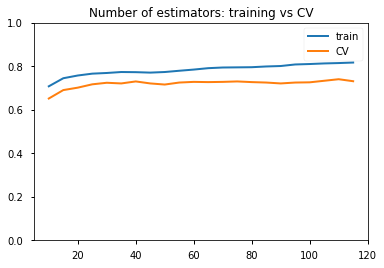

In [45]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_estimators, L_train, linewidth=2, label='train')
ax.set_ylim(0, 1)
ax.set_title("Number of estimators: training vs CV")
ax.plot(n_estimators, L_validation, linewidth=2, label='CV')
ax.legend()

## Max Features

In [47]:
max_features = range(2,20,1)
L_train = []
L_validation = []
for max_feature in max_features:
    gb = GradientBoostingClassifier(n_estimators=40, learning_rate = 0.08, max_features=max_feature, max_depth=8, subsample=0.4, random_state = 0)
    gb.fit(X_train, y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))
    score_train = gb.score(X_train, y_train)
    score_validation = gb.score(X_validation, y_validation)
    L_train.append(score_train)
    L_validation.append(score_validation)

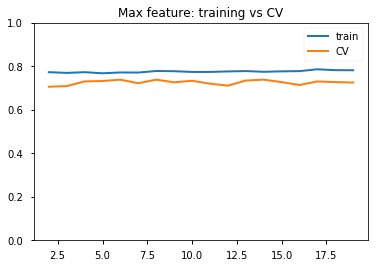

In [48]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(max_features, L_train, linewidth=2, label='train')
ax.set_ylim(0, 1)
ax.set_title("Max feature: training vs CV")
ax.plot(max_features, L_validation, linewidth=2, label='CV')
ax.legend()

## Sub sample

In [49]:
subsamples = [x/10 for x in range(2,10)]
L_train = []
L_validation = []
for subsample in subsamples:
    gb = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate = 0.08, max_features=4, max_depth=8, subsample=subsample, random_state = 0)
    gb.fit(X_train, y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))
    score_train = gb.score(X_train, y_train)
    score_validation = gb.score(X_validation, y_validation)
    L_train.append(score_train)
    L_validation.append(score_validation)

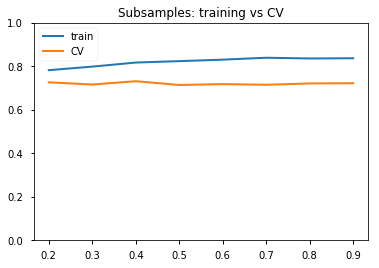

In [50]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(subsamples, L_train, linewidth=2, label='train')
ax.set_ylim(0, 1)
ax.set_title("Subsamples: training vs CV")
ax.plot(subsamples, L_validation, linewidth=2, label='CV')
ax.legend()

## Predictor for heat map

In [51]:
gb = GradientBoostingClassifier(n_estimators=40, learning_rate = 0.08, max_features=4, max_depth=8, subsample=0.4,random_state = 0)
gb.fit(X_train, y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.08, loss='deviance', max_depth=8,
              max_features=4, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=0, subsample=0.4, verbose=0,
              warm_start=False)

In [88]:
prediction = gb.predict(X_tr)
sum(prediction)

1511

In [66]:
#df8.loc[prediction]['business_longitude']

In [79]:
a = df8.loc[prediction]['business_longitude'].values
b = df8.loc[prediction]['business_latitude'].values

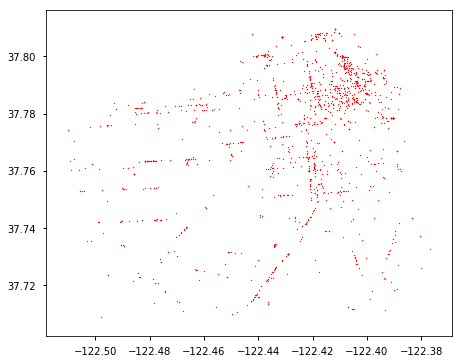

In [80]:
#fig = plt.figure
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)

#ax=fig.add
# a = np.random.randint(1000, size=50)
# b = np.random.randint(1000, size=50)
col = np.where((a+b) % 2== 0, 'r','b')
ax1.scatter(a, b, color='r', s=1)

## Actual and predicted side by side

In [87]:
mask_actual = df8['y_label']
sum(mask_actual)

2116

In [82]:
c = df8.loc[mask_actual]['business_longitude'].values
d = df8.loc[mask_actual]['business_latitude'].values
# a = df8.loc[prediction]['business_longitude'].values
# b = df8.loc[prediction]['business_latitude'].values

Text(0.5,1,'Predicted violated restaurants')

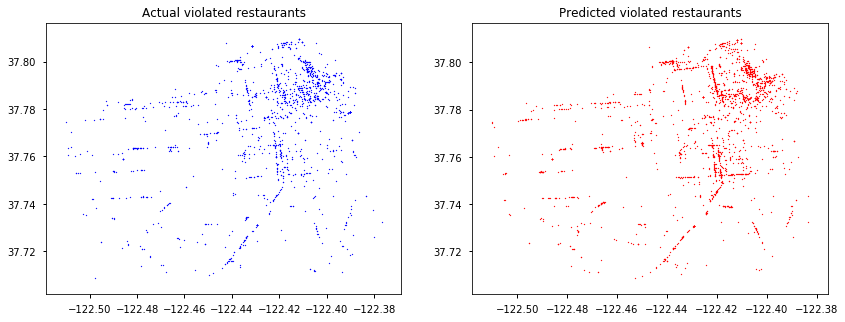

In [86]:
#fig = plt.figure
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(a, b, color='b', s=1)
ax[0].set_title("Actual violated restaurants")
ax[1].scatter(c, d, color='r', s=1)
# ax[1].plot(x, unif.pdf(x), linewidth=2)
# ax[1].set_ylim(-0.5, 1.5)
ax[1].set_title("Predicted violated restaurants")